### Life cycle of a Data Science project

- 1. Get the Data

     a. Frame the problem
     
     b. Validate the assumptions
     
     
- 2. EDA
 
     a. Missing values check
     
     b. Validate the data types
     
     c. Correlation analysis
     
     d. Uncover some insights.
     
     
- 3. Data preprocessing
 
     a. Handling missing values
     
     b. Handling incorrect data types
     
     c. Feature scaling
     
     d. Outlier treatment
     
     
- 4. Select and apply ML algorithm
 
     a. Experiment with certain algorithm
     
     b. Apply K fold cross validation
     
     
- 5. Fine Tuning

     a. Implementation on the test
     
     b. Overfitting/ Underfitting....?
     
     c. Hyperparameter tuning
     
     d. Regularization
     
     
- 6. Deploy maintain and monitor the system

     a. On a server ( AWS, Azure, Watson ) - 95%
     
     b. MObile OS ( Android, IOS ) - 4%
     
     c. Semiconductor hadware ( Raspberry pi, jetson Nano ) - 1%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,8]
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('adult.data', na_values = ' ?')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country','salary']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.isnull().sum()/len(df)*100

age               0.000000
workclass         5.638821
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660319
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790541
salary            0.000000
dtype: float64

In [7]:
# we have missing values in the data

In [8]:
df['salary'].value_counts() / len(df)*100

 <=50K    75.918305
 >50K     24.081695
Name: salary, dtype: float64

In [9]:
# the data is imbalanced

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# No missing vales in the continuous data
# Range is different

In [12]:
df_num = df.select_dtypes([np.number])

In [13]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


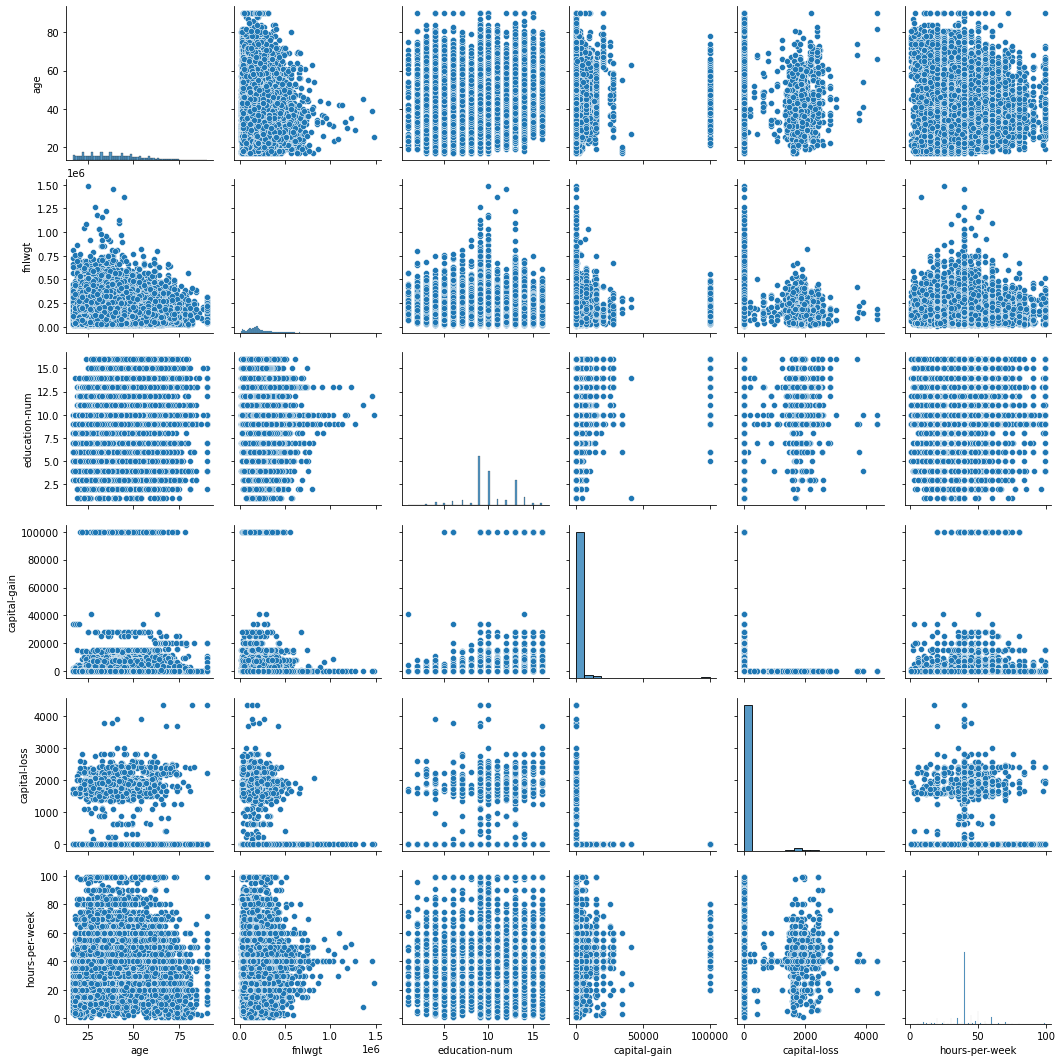

In [14]:
sns.pairplot(df_num)

In [15]:
df_num.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education-num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital-gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital-loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

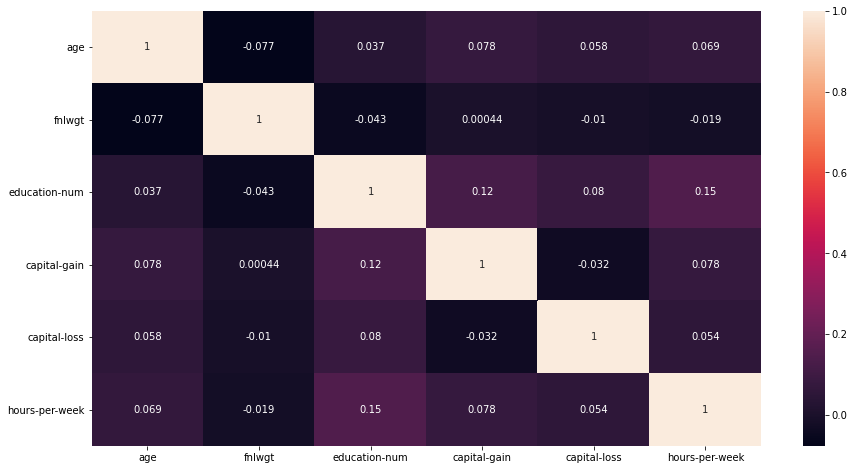

In [16]:
sns.heatmap(df_num.corr(), annot = True)

In [17]:
# No two continuous features are correlated.

In [18]:
df_cat = df.select_dtypes([object])

In [19]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [20]:
category = []
for col in list(df_cat.columns):
    category.append(df_cat[col].value_counts())

In [21]:
print(category)

[ Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64,  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64,  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64,  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerica

In [22]:
# we got value counts for all the categorical variables 

In [23]:
# Do we need to apply Data preprocessing before or after ?
# Ans: we apply it before because we dont want to leak the information to the test data. (Data leakege problem)

In [24]:
# Splitting the data feature matrix and target vector
# Apply train test split
# there is a single row for holland- netherlands in the country feature, so we shall drop it.

In [25]:
df.shape

(32560, 15)

### train_test_split

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state =10)

In [29]:
print('X_train shape:', xtrain.shape)
print('X_test shape:', xtest.shape)
print('y_train shape:', ytrain.shape)
print('y_test shape:', ytest.shape)

X_train shape: (26048, 14)
X_test shape: (6512, 14)
y_train shape: (26048,)
y_test shape: (6512,)


### Data preprocessing

In [30]:
# applying preprocesssing techniques on the train set.

In [31]:
X_num = xtrain.select_dtypes([np.number])

In [32]:
X_cat = xtrain.select_dtypes('O')

In [33]:
X_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
12176,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
190,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
22645,Self-emp-inc,Assoc-voc,Never-married,Craft-repair,Not-in-family,White,Male,United-States
4802,Private,Assoc-acdm,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,Philippines
16052,Private,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [34]:
# Imputing the null values

In [7]:
from sklearn.impute import SimpleImputer

In [36]:
sim = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(sim.fit_transform(X_cat), columns = X_cat.columns)

In [37]:
X_cat.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [38]:
# Encoding the dummy variables

In [39]:
X_cat = pd.get_dummies(X_cat, drop_first = True)

In [40]:
X_cat.shape

(26048, 90)

In [41]:
# Scaling the categorical featues

In [12]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
X_num = pd.DataFrame(ss.fit_transform(X_num), columns = X_num.columns)

In [44]:
# Merging the Categorical and numerical features

In [45]:
X_train_final = pd.concat([X_num, X_cat], axis = 1)

In [46]:
X_train_final.shape

(26048, 96)

In [47]:
# Label encoding on the target variable

In [13]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
y_train = pd.Series(le.fit_transform(ytrain)) 

### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [52]:
logreg.score(X_train_final, y_train)

0.8515433046683046

In [53]:
X_test_num = xtest.select_dtypes([np.number])
X_test_cat = xtest.select_dtypes('O')

In [54]:
X_test_cat = pd.DataFrame(sim.transform(X_test_cat), columns = X_test_cat.columns)

In [55]:
X_test_cat.isnull().sum().sum()

0

In [56]:
X_test_cat = pd.get_dummies(X_test_cat, drop_first = True)

In [57]:
X_test_cat.shape

(6512, 90)

In [58]:
X_test_num = pd.DataFrame(ss.transform(X_test_num), columns = X_test_num.columns)

In [59]:
X_test_final = pd.concat([X_test_num, X_test_cat], axis = 1)

In [60]:
X_test_final.shape

(6512, 96)

In [61]:
y_test= pd.Series(le.transform(ytest)) 

In [62]:
y_test.shape

(6512,)

In [63]:
y_test[:5]

0    1
1    1
2    0
3    0
4    1
dtype: int32

In [64]:
logreg.score(X_test_final, y_test)

0.8521191646191646

In [65]:
# Generating predictions on the test data

In [66]:
y_pred = logreg.predict(X_test_final)

In [67]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score

In [69]:
cm = confusion_matrix(y_test, y_pred)

In [70]:
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:<50k', 'Predicted:>50k'], index = ['Actual:<50k', 'Actual:>50k'])

<AxesSubplot:>

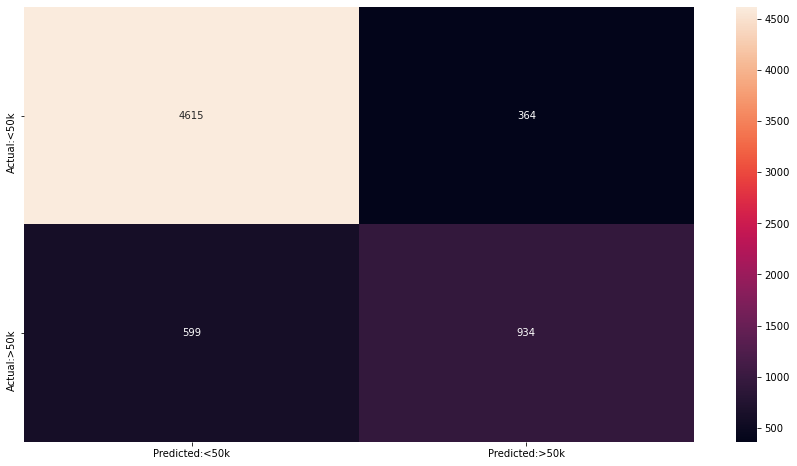

In [71]:
sns.heatmap(con_mat, annot = True, fmt = 'd')

In [72]:
# Logistic regression is generating more False Negatives

In [73]:
precision_score(y_test, y_pred)

0.7195685670261941

In [74]:
recall_score(y_test, y_pred)

0.6092628832354859

In [75]:
f1_score(y_test, y_pred)

0.6598375132462027

In [76]:
y_scores = logreg.predict_proba(X_test_final)

In [77]:
y_scores=y_scores[:, 1]

In [78]:
fpr, tpr, th = roc_curve(y_test, y_scores)

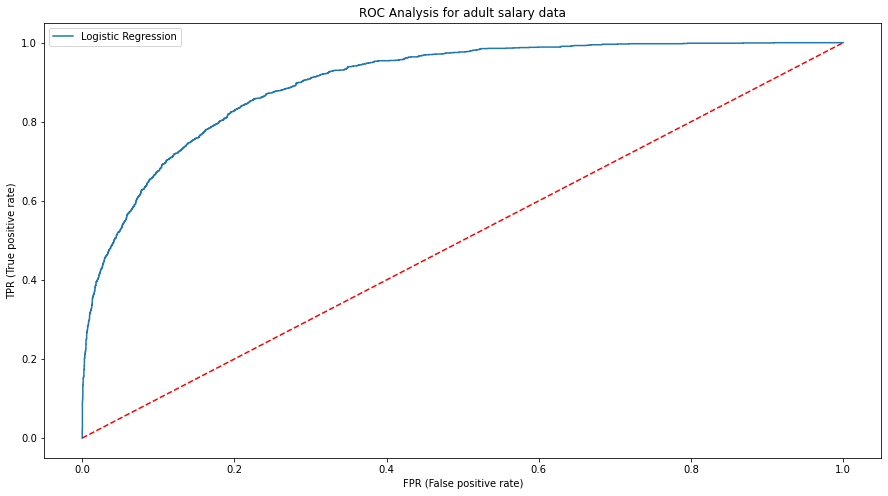

In [79]:
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('FPR (False positive rate)')
plt.ylabel('TPR (True positive rate)')
plt.title('ROC Analysis for adult salary data')
plt.legend()
plt.show()

In [80]:
roc_auc_score(y_test, y_scores)

0.9009896359229311

### Tuned LogisticRegression

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 
          'class_weight' : ['balanced'], 
           'max_iter': [100, 1000], 
           'solver': ['lbfgs', 'saga']}

In [83]:
grid = GridSearchCV(LogisticRegression(), param_grid)

In [84]:
grid.fit(X_train_final, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'], 'max_iter': [100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'saga']})

In [85]:
grid.best_params_

{'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'saga'}

In [86]:
best_logreg = grid.best_estimator_

In [87]:
y_pred_best = best_logreg.predict(X_test_final)

In [88]:
best_logreg.score(X_train_final, y_train)

0.8103885135135135

In [89]:
y_scores_best = best_logreg.predict_proba(X_test_final)

In [90]:
y_scores_best=y_scores_best[:, 1]

In [91]:
fpr, tpr, th = roc_curve(y_test, y_scores_best)

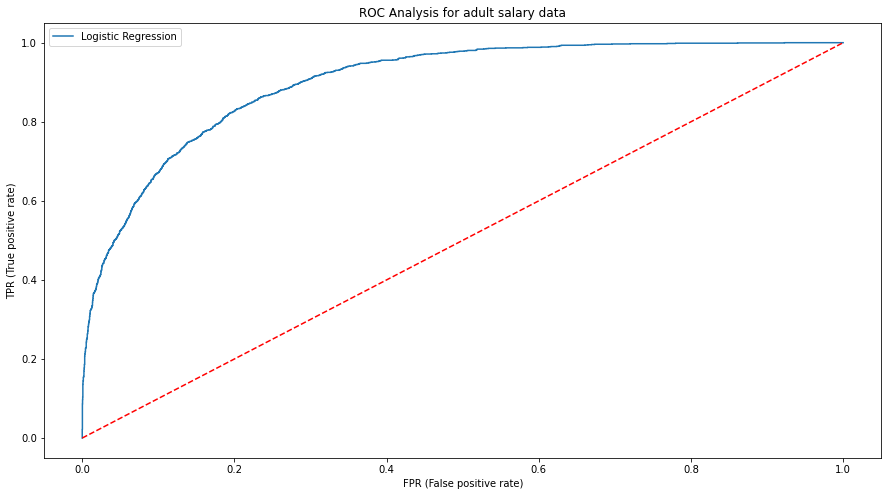

In [92]:
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('FPR (False positive rate)')
plt.ylabel('TPR (True positive rate)')
plt.title('ROC Analysis for adult salary data')
plt.legend()
plt.show()

In [93]:
roc_auc_score(y_test, y_scores_best)

0.9007217135190237

### DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train_final, y_train)

dtf.score(X_train_final, y_train)

0.9999616093366094

<AxesSubplot:ylabel='None'>

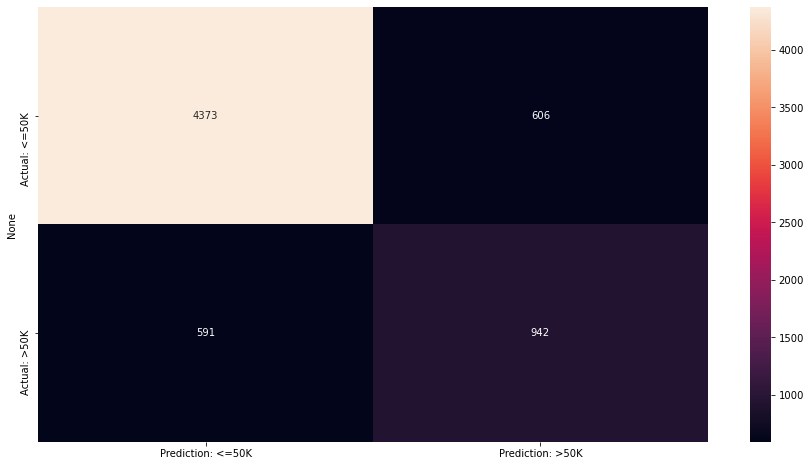

In [95]:
y_pred_dt = dtf.predict(X_test_final)

# Confusion matrix analysis

cm_dt = confusion_matrix(y_test, y_pred_dt)
conf_mat_dt = pd.DataFrame(data = cm_dt, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_dt, annot = True, fmt = 'd')

In [96]:
# Decision Tree is generating more False Positives

print(precision_score(y_test, y_pred_dt)) #61%
print(recall_score(y_test, y_pred_dt)) # 62%
print(f1_score(y_test, y_pred_dt)) # 61%

0.6085271317829457
0.6144814090019569
0.6114897760467379


In [97]:
y_scores_dt = dtf.predict_proba(X_test_final)
y_scores_dt = y_scores_dt[:, 1]

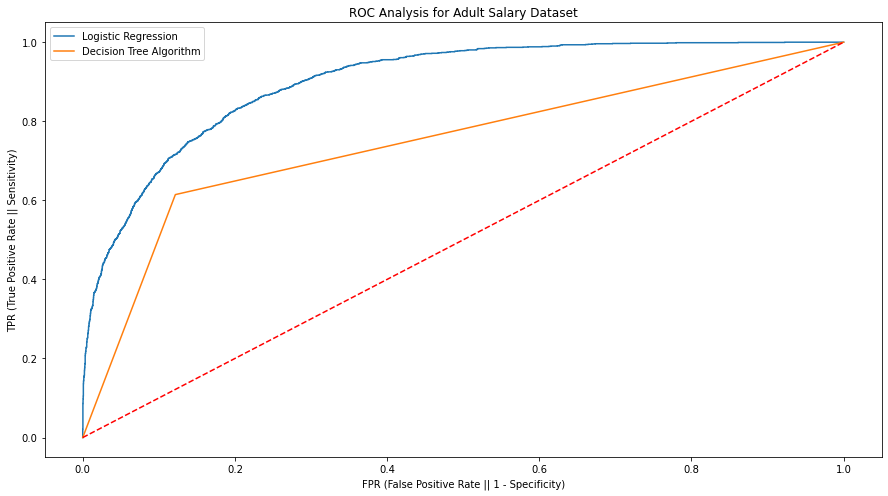

0.7463851110083092


In [98]:
fpr_dt, tpr_dt, th_dt = roc_curve(y_test, y_scores_dt)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC Analysis for Adult Salary Dataset')
plt.legend()
plt.show()

print(roc_auc_score(y_test, y_scores_dt))
# 74.5%

### Tuned Decision Tree

In [99]:
# Tuning the decision tree model for even better results

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [7, 11, 15, 21, 30],
          'min_samples_leaf': [1, 3, 5, 7]}

grid1 = GridSearchCV(DecisionTreeClassifier(), params)
grid1.fit(X_train_final, y_train)

grid1.best_params_
best_dt = grid1.best_estimator_

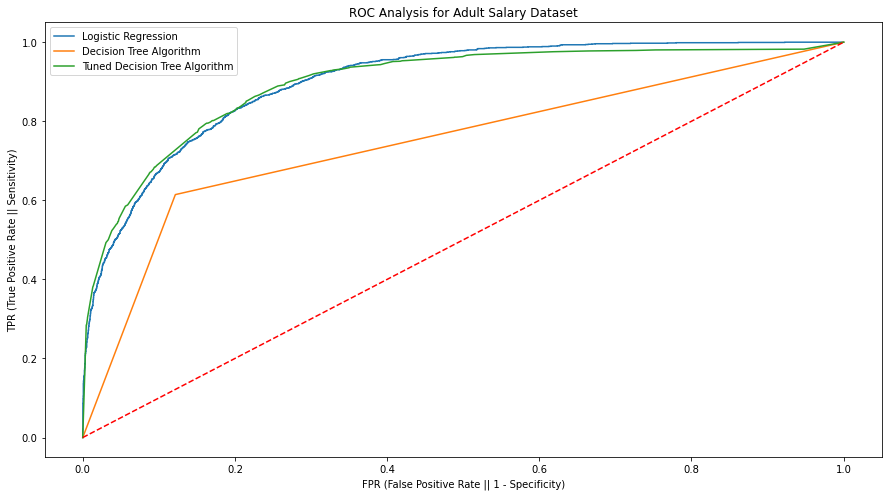

0.8964860502826809


In [100]:
y_pred_bestdt = best_dt.predict(X_test_final)
best_dt.score(X_test_final, y_test)
# 85.19%

y_scores_bestdt = best_dt.predict_proba(X_test_final)
y_scores_bestdt = y_scores_bestdt[:, 1]

fpr_bestdt, tpr_bestdt, th_bestdt = roc_curve(y_test, y_scores_bestdt)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot(fpr_bestdt, tpr_bestdt, label = 'Tuned Decision Tree Algorithm')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC Analysis for Adult Salary Dataset')
plt.legend()
plt.show()

print(roc_auc_score(y_test, y_scores_bestdt))
# 89.6%

In [101]:
# Ensemble techniques
# 1. Voting Classifier
# 2. Bagging Classifier
# 3. Random Forest
# 4. Extra Trees
# 5. Boosting Classifier
# 6. Special League (XGB, LightGBM)

### Voting Classifier

In [102]:
# Deploy the tuned logistic regression model into production

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [104]:
from sklearn.ensemble import VotingClassifier

In [105]:
vote = VotingClassifier([('LR', LogisticRegression()), 
                  ('knn', KNeighborsClassifier()), 
                 ('DT', DecisionTreeClassifier()),  
                 ('NB', GaussianNB())], voting = 'soft')

In [106]:
vote.fit(X_train_final, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('NB', GaussianNB())],
                 voting='soft')

In [107]:
vote.score(X_train_final, y_train)

0.948210995085995

In [108]:
vote.score(X_test_final, y_test)

0.8277027027027027

<AxesSubplot:ylabel='None'>

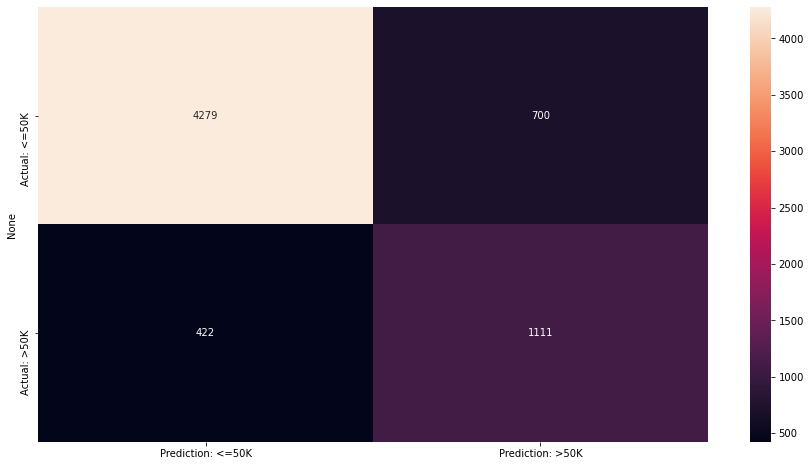

In [109]:
y_pred_vote = vote.predict(X_test_final)

# Confusion matrix analysis

cm_vote = confusion_matrix(y_test, y_pred_vote)
conf_mat_vote = pd.DataFrame(data = cm_vote, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_vote, annot = True, fmt = 'd')

In [110]:
y_scores_vote = vote.predict_proba(X_test_final)
y_scores_vote = y_scores_vote[:, 1]

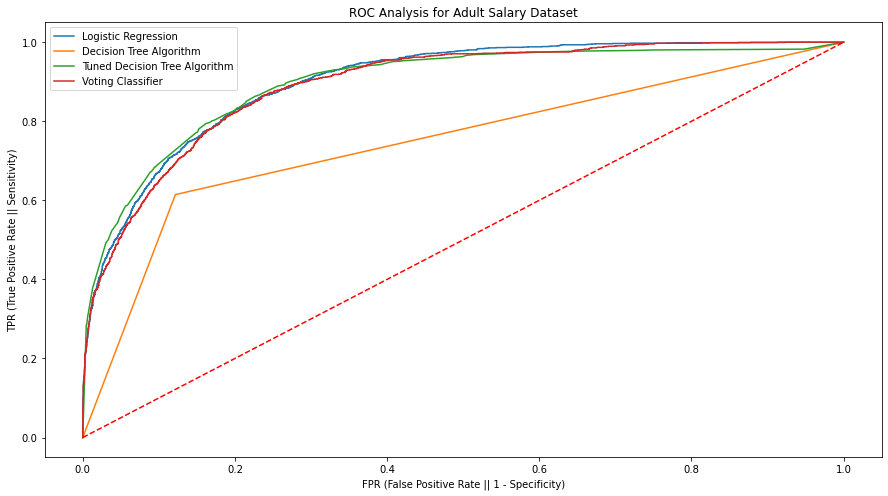

0.8936506582702799


In [111]:
fpr_vote, tpr_vote, th_vote = roc_curve(y_test, y_scores_vote)

plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot(fpr_bestdt, tpr_bestdt, label = 'Tuned Decision Tree Algorithm')
plt.plot(fpr_vote, tpr_vote, label = 'Voting Classifier')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC Analysis for Adult Salary Dataset')
plt.legend()
plt.show()

print(roc_auc_score(y_test, y_scores_vote))
# 89.6%

### Bagging Classifier

In [112]:
from sklearn.ensemble import BaggingClassifier

In [113]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=15)

In [114]:
bag.fit(X_train_final, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

In [115]:
bag.score(X_train_final, y_train)

0.9948940417690417

In [116]:
bag.score(X_test_final, y_test)

0.8513513513513513

<AxesSubplot:ylabel='None'>

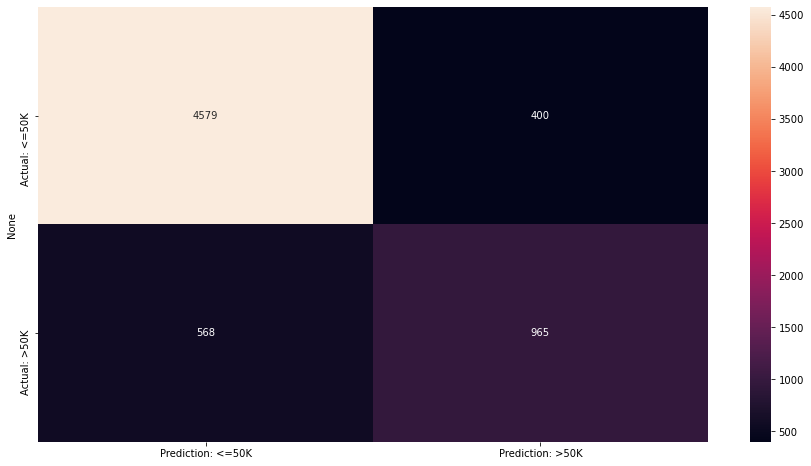

In [117]:
y_pred_bag = bag.predict(X_test_final)

# Confusion matrix analysis

cm_bag = confusion_matrix(y_test, y_pred_bag)
conf_mat_bag = pd.DataFrame(data = cm_bag, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_bag, annot = True, fmt = 'd')

In [118]:
y_scores_bag = vote.predict_proba(X_test_final)
y_scores_bag = y_scores_bag[:, 1]
fpr_bag, tpr_bag, th_bag = roc_curve(y_test, y_scores_bag)

### Random Forest Vs Extra trees Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier

In [120]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [121]:
rf.fit(X_train_final, y_train)
et.fit(X_train_final, y_train)

ExtraTreesClassifier()

In [122]:
rf.score(X_train_final, y_train)

0.9999616093366094

In [123]:
et.score(X_train_final, y_train)

0.9999616093366094

In [124]:
rf.score(X_test_final, y_test)

0.8538083538083538

In [125]:
et.score(X_test_final, y_test)

0.8344594594594594

<AxesSubplot:ylabel='None'>

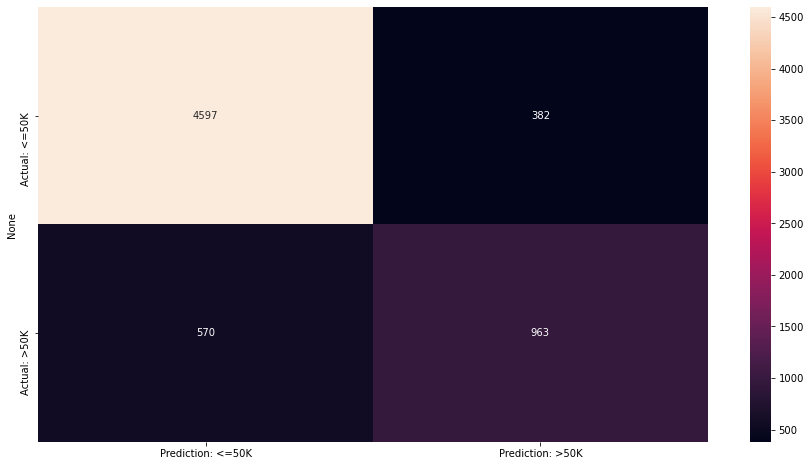

In [126]:
y_pred_rf = rf.predict(X_test_final)

# Confusion matrix analysis

cm_rf = confusion_matrix(y_test, y_pred_rf)
conf_mat_rf = pd.DataFrame(data = cm_rf, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_rf, annot = True, fmt = 'd')

<AxesSubplot:ylabel='None'>

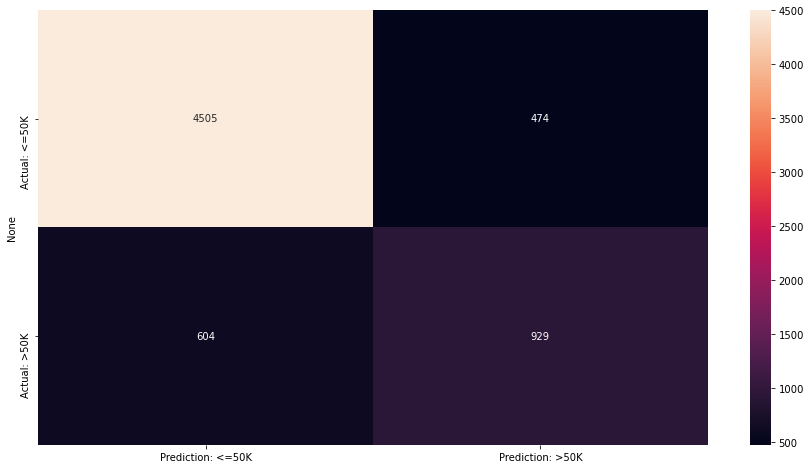

In [127]:
y_pred_et= et.predict(X_test_final)

# Confusion matrix analysis

cm_et = confusion_matrix(y_test, y_pred_et)
conf_mat_et= pd.DataFrame(data = cm_et, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_et, annot = True, fmt = 'd')

In [128]:
y_scores_rf = rf.predict_proba(X_test_final)
y_scores_rf = y_scores_rf[:, 1]
fpr_rf, tpr_rf, th_rf = roc_curve(y_test, y_scores_rf)

In [129]:
y_scores_et = et.predict_proba(X_test_final)
y_scores_et = y_scores_et[:, 1]
fpr_et, tpr_et, th_et = roc_curve(y_test, y_scores_et)

### Boosting (Adaboost and Gradientboost)

In [23]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [131]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [132]:
ada.fit(X_train_final, y_train)
gbc.fit(X_train_final, y_train)

GradientBoostingClassifier()

In [133]:
ada.score(X_train_final, y_train)

0.8604499385749386

In [134]:
gbc.score(X_train_final, y_train)

0.8680128992628993

In [135]:
ada.score(X_test_final, y_test)

0.8614864864864865

In [136]:
gbc.score(X_test_final, y_test)

0.8682432432432432

<AxesSubplot:ylabel='None'>

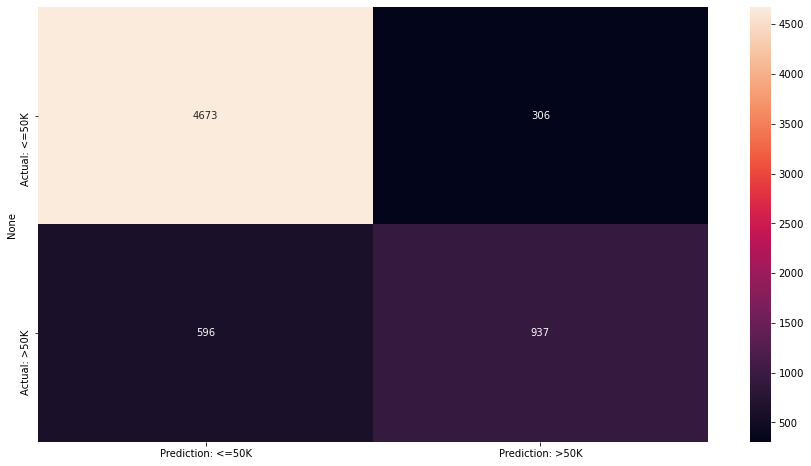

In [137]:
y_pred_ada = ada.predict(X_test_final)

# Confusion matrix analysis

cm_ada = confusion_matrix(y_test, y_pred_ada)
conf_mat_ada = pd.DataFrame(data = cm_ada, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_ada, annot = True, fmt = 'd')

<AxesSubplot:ylabel='None'>

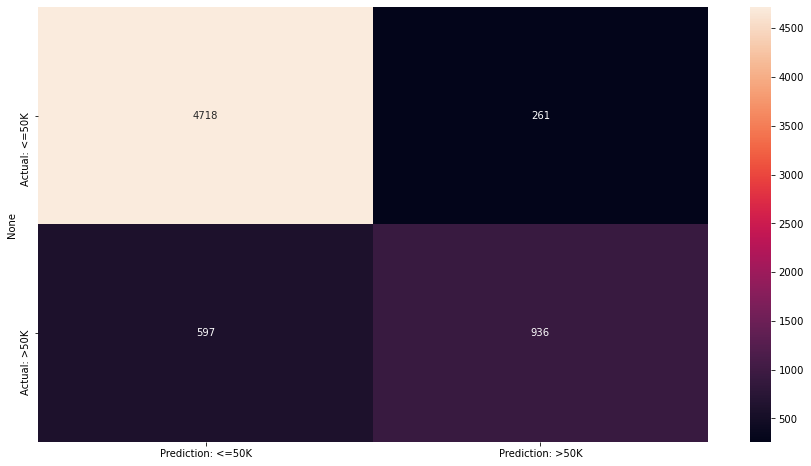

In [138]:
y_pred_gbc = gbc.predict(X_test_final)

# Confusion matrix analysis

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
conf_mat_gbc = pd.DataFrame(data = cm_gbc, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_gbc, annot = True, fmt = 'd')

In [139]:
y_scores_ada = ada.predict_proba(X_test_final)
y_scores_ada = y_scores_ada[:, 1]
fpr_ada, tpr_ada, th_ada = roc_curve(y_test, y_scores_ada)

In [140]:
y_scores_gbc = gbc.predict_proba(X_test_final)
y_scores_gbc = y_scores_gbc[:, 1]
fpr_gbc, tpr_gbc, th_gbc = roc_curve(y_test, y_scores_gbc)

### XGB and Lightgbm

In [141]:
from xgboost import XGBClassifier

In [142]:
xgb = XGBClassifier()

In [143]:
from lightgbm import LGBMClassifier

In [144]:
lgbm = LGBMClassifier()

In [145]:
xgb.fit(X_train_final, y_train)
lgbm.fit(X_train_final, y_train)

[17:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

In [146]:
xgb.score(X_train_final, y_train)

0.9073633292383292

In [147]:
lgbm.score(X_train_final, y_train)

0.8897420147420148

In [148]:
xgb.score(X_test_final, y_test)

0.8693181818181818

In [149]:
lgbm.score(X_test_final, y_test)

0.870085995085995

<AxesSubplot:ylabel='None'>

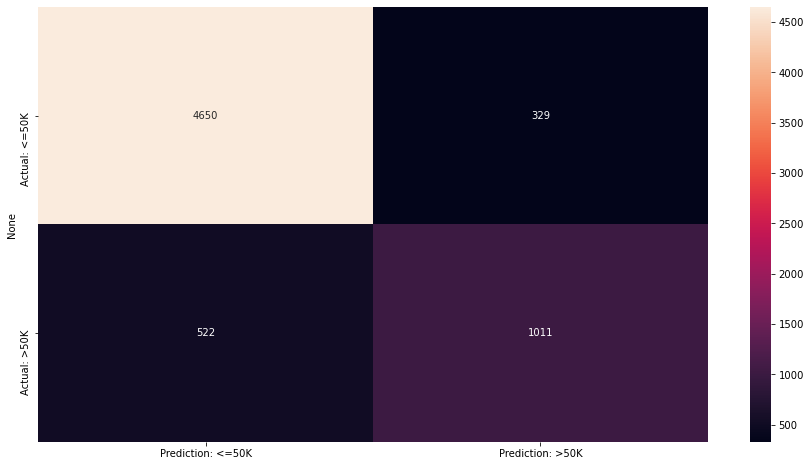

In [150]:
y_pred_xgb = xgb.predict(X_test_final)

# Confusion matrix analysis

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_mat_xgb = pd.DataFrame(data = cm_xgb, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_xgb, annot = True, fmt = 'd')

<AxesSubplot:ylabel='None'>

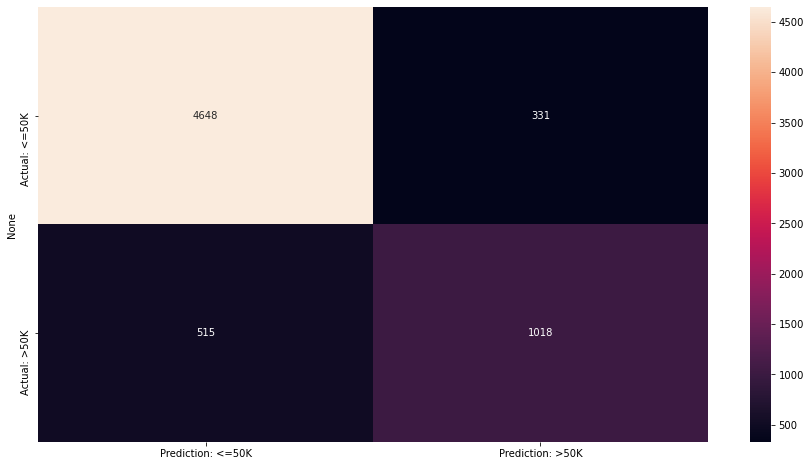

In [151]:
y_pred_lgbm = lgbm.predict(X_test_final)

# Confusion matrix analysis

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
conf_mat_lgbm = pd.DataFrame(data = cm_lgbm, columns = ['Prediction: <=50K', 'Prediction: >50K'],
                        index = [['Actual: <=50K', 'Actual: >50K']])
sns.heatmap(conf_mat_lgbm, annot = True, fmt = 'd')

In [152]:
y_scores_xgb = xgb.predict_proba(X_test_final)
y_scores_xgb = y_scores_xgb[:, 1]
fpr_xgb, tpr_xgb, th_xgb = roc_curve(y_test, y_scores_xgb)

In [153]:
y_scores_lgbm = lgbm.predict_proba(X_test_final)
y_scores_lgbm = y_scores_lgbm[:, 1]
fpr_lgbm, tpr_lgbm, th_lgbm = roc_curve(y_test, y_scores_lgbm)

In [154]:
############ Algorithm selection done ############

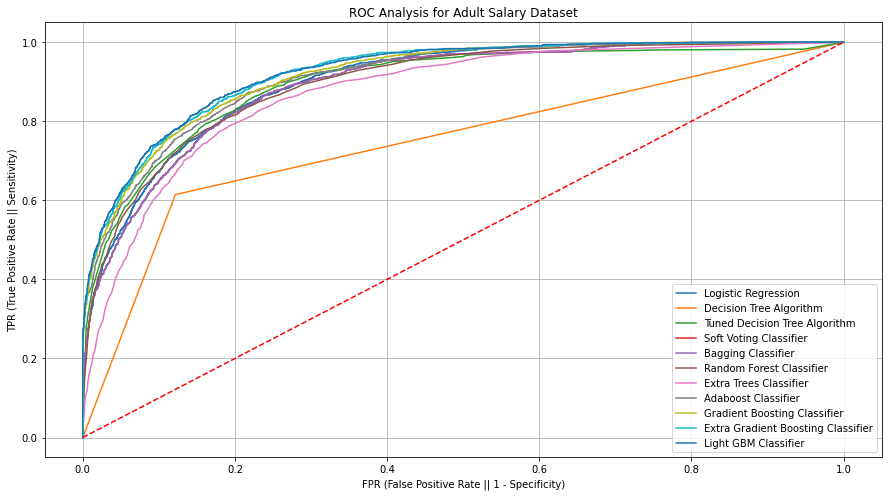

In [155]:
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot(fpr_bestdt, tpr_bestdt, label = 'Tuned Decision Tree Algorithm')
plt.plot(fpr_vote, tpr_vote, label = 'Soft Voting Classifier')
plt.plot(fpr_bag, tpr_bag, label = 'Bagging Classifier')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest Classifier')
plt.plot(fpr_et, tpr_et, label = 'Extra Trees Classifier')
plt.plot(fpr_ada, tpr_ada, label = 'Adaboost Classifier')
plt.plot(fpr_gbc, tpr_gbc, label = 'Gradient Boosting Classifier')
plt.plot(fpr_xgb, tpr_xgb, label = 'Extra Gradient Boosting Classifier')
plt.plot(fpr_lgbm, tpr_lgbm, label = 'Light GBM Classifier')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC Analysis for Adult Salary Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
roc_scores = pd.DataFrame()

In [157]:
roc_scores['Logistic Regression'] = roc_auc_score(y_test, y_scores)
roc_scores['Decision Tree Algorithm'] = roc_auc_score(y_test, y_scores_dt)
roc_scores['Tuned Decision Tree Algorithm'] = roc_auc_score(y_test,y_scores_bestdt)
roc_scores['Soft Voting Classifier'] = roc_auc_score(y_test, y_scores_vote)
roc_scores['Bagging Classifier'] = roc_auc_score(y_test, y_scores_bag)
roc_scores['Random Forest Classifier'] = roc_auc_score(y_test, y_scores_rf)
roc_scores['Extra Trees Classifier'] = roc_auc_score(y_test, y_scores_et)
roc_scores['Adaboost Classifier'] = roc_auc_score(y_test, y_scores_ada)
roc_scores['Gradient Boosting Classifier'] = roc_auc_score(y_test, y_scores_gbc)
roc_scores['Extra Gradient Boosting Classifier'] = roc_auc_score(y_test, y_scores_xgb)
roc_scores['Light GBM Classifier'] = roc_auc_score(y_test, y_scores_lgbm)

In [158]:
roc_scores

,Logistic Regression,Decision Tree Algorithm,Tuned Decision Tree Algorithm,Soft Voting Classifier,Bagging Classifier,Random Forest Classifier,Extra Trees Classifier,Adaboost Classifier,Gradient Boosting Classifier,Extra Gradient Boosting Classifier,Light GBM Classifier


In [159]:
print('roc_scores-Logistic Regression: \n',  roc_auc_score(y_test, y_scores))
print('roc_scores-Decision Tree Algorithm \n', roc_auc_score(y_test, y_scores_dt))
print('roc-scores-Tuned Decision Tree Algorithm \n',  roc_auc_score(y_test,y_scores_bestdt))
print('roc_scores-Soft Voting Classifier \n', roc_auc_score(y_test, y_scores_vote))
print('roc_scores-Bagging Classifier \n',  roc_auc_score(y_test, y_scores_bag))
print('roc_scores-Random Forest Classifier \n',  roc_auc_score(y_test, y_scores_rf))
print('roc_scores-Extra Trees Classifier \n',  roc_auc_score(y_test, y_scores_et))
print('roc_scores-Adaboost Classifier \n',  roc_auc_score(y_test, y_scores_ada))
print('roc_scores-Gradient Boosting Classifier \n',  roc_auc_score(y_test, y_scores_gbc))
print('roc_scores-Extra Gradient Boosting Classifier \n', roc_auc_score(y_test, y_scores_xgb))
print('roc_scores- Light GBM Classifier \n',  roc_auc_score(y_test, y_scores_lgbm))

roc_scores-Logistic Regression: 
 0.9009896359229311
roc_scores-Decision Tree Algorithm 
 0.7463851110083092
roc-scores-Tuned Decision Tree Algorithm 
 0.8964860502826809
roc_scores-Soft Voting Classifier 
 0.8936506582702799
roc_scores-Bagging Classifier 
 0.8936506582702799
roc_scores-Random Forest Classifier 
 0.8962650306761326
roc_scores-Extra Trees Classifier 
 0.8722198792659109
roc_scores-Adaboost Classifier 
 0.9112745808979579
roc_scores-Gradient Boosting Classifier 
 0.9167449799267818
roc_scores-Extra Gradient Boosting Classifier 
 0.9223916574859025
roc_scores- Light GBM Classifier 
 0.9237617301210419


### Stacking Classifier

In [160]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier([('RF', RandomForestClassifier()),
                            ('ET', ExtraTreesClassifier()),
                            ('LR', LogisticRegression())], final_estimator = LGBMClassifier())
stack.fit(X_train_final, y_train)

StackingClassifier(estimators=[('RF', RandomForestClassifier()),
                               ('ET', ExtraTreesClassifier()),
                               ('LR', LogisticRegression())],
                   final_estimator=LGBMClassifier())

In [161]:
print(stack.score(X_train_final, y_train)) # 90%
print(stack.score(X_test_final, y_test)) # 85%

0.878877457002457
0.8587223587223587


In [5]:
############### Automating the script #############

In [18]:
# Defing the preprocessing function

def adult_preprocessing(df):

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Applying preprocessing techniques on the train set

    X_num = X_train.select_dtypes(np.number)
    X_cat = X_train.select_dtypes('O')
    
    X_num_test = X_test.select_dtypes(np.number)
    X_cat_test = X_test.select_dtypes('O')
    
    # Missing values imputation
    
    sim = SimpleImputer(strategy = 'most_frequent')
    X_cat = pd.DataFrame(sim.fit_transform(X_cat), columns = X_cat.columns)
    X_cat_test = pd.DataFrame(sim.transform(X_cat_test), columns = X_cat_test.columns)
    print("Sanity check")
    print(X_cat.isnull().sum())
    
    # Dummy encoding
    
    X_cat = pd.get_dummies(X_cat, drop_first = True)
    X_cat_test = pd.get_dummies(X_cat_test, drop_first = True)
    
    # Scaling the continuous features
    
    sc = StandardScaler()
    X_num = pd.DataFrame(sc.fit_transform(X_num), columns = X_num.columns)
    X_num_test = pd.DataFrame(sc.transform(X_num_test), columns = X_num_test.columns)
    
    # Merging the continuous and categorical data together
    
    X_train_final = pd.concat([X_num, X_cat], axis = 1)
    X_test_final = pd.concat([X_num_test, X_cat_test], axis = 1)
    
    # Label encoding on the target variable
    
    lab = LabelEncoder()
    y_train = pd.Series(lab.fit_transform(y_train))
    y_test = pd.Series(lab.transform(y_test))

    return X_train_final, X_test_final, y_train, y_test

In [19]:
# Calling the preprocessing function
    
X_train, X_test, y_train, y_test = adult_preprocessing(df)

Sanity check
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64


In [27]:
# Defining a Model training and scoring function

def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_score = estimator.predict_proba(X_test)
    y_score = y_score[:, 1]
    fpr, tpr, th = roc_curve(y_test, y_score)
    cm = confusion_matrix(y_test, y_pred)
    fp = cm[0][1]
    fn = cm[1][0]
    
    fi = pd.DataFrame()
    fi['Feature'] = list(X_train.columns)
    fi['Importance_Score'] = estimator.feature_importances_
    fi = fi.sort_values(by = 'Importance_Score', ascending = False)
    fi.to_csv('Feature_Importance.csv')
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("False Positive Percentage: {}".format(fp/len(y_test) * 100))
    print("False Negative Percentage: {}".format(fn/len(y_test) * 100))
    print("Precision: {}".format(precision_score(y_test, y_pred)))
    print("Recall: {}".format(recall_score(y_test, y_pred)))
    print("F1 Score: {}".format(f1_score(y_test, y_pred)))
    print("ROC AUC Score: {}".format(roc_auc_score(y_test, y_score)))
    print()
    print("**************************************************")
    plt.plot(fpr, tpr, label = estimator.__class__.__name__)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
    plt.ylabel('TPR (True Positive Rate || Sensitivity)')
    plt.title('ROC Analysis for Adult Salary Dataset')
    plt.grid(True)
    plt.legend()
    plt.show()

**************************************************
________RandomForestClassifier__________

Accuracy: 0.855896805896806
False Positive Percentage: 5.675675675675676
False Negative Percentage: 8.734643734643734
Precision: 0.7295081967213115
Recall: 0.6366888094021461
F1 Score: 0.6799454297407912
ROC AUC Score: 0.9073187306815107

**************************************************


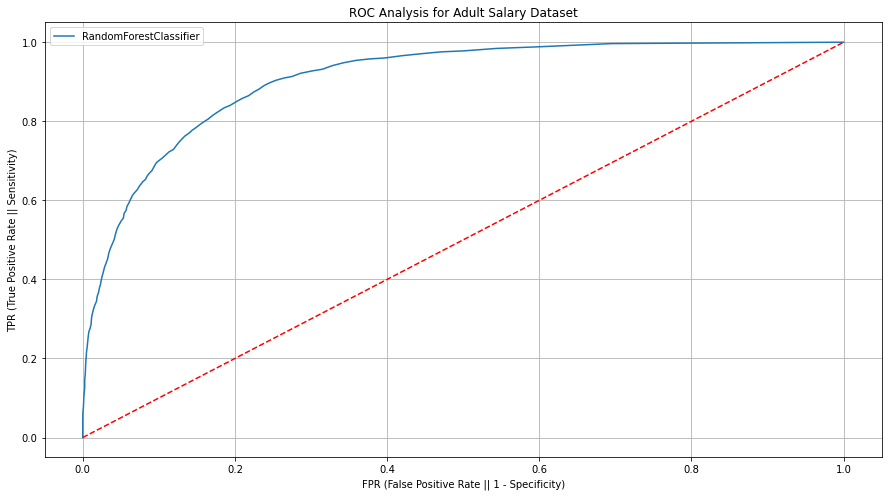

In [32]:
# Calling the model train and score function
    
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________GradientBoostingClassifier__________

Accuracy: 0.8670761670761671
False Positive Percentage: 3.857493857493857
False Negative Percentage: 9.434889434889435
Precision: 0.791084497671324
Recall: 0.6075625958099131
F1 Score: 0.6872832369942197
ROC AUC Score: 0.9250184977336194

**************************************************


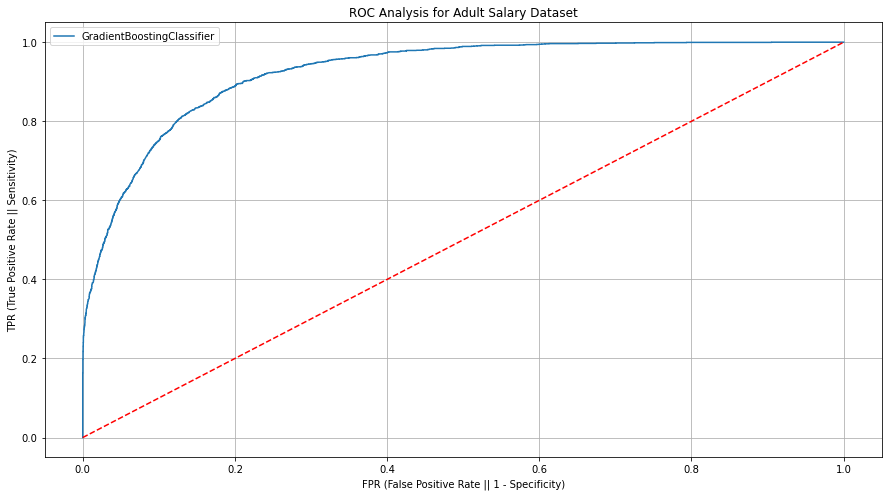

In [34]:
model_train_and_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

In [ ]:
# Insight: Automation displays the result on console, saves important
# information on the disc and also plots the relevant graph